In [1]:
# !pip install pandas

In [2]:
from minio import Minio
import duckdb
import pandas as pd
import numpy as np

In [3]:
ACCESS_KEY = "RkX19daoA4QpeUytwGna"
SECRET_ACCESS_KEY = "jIr2nk8MPaT6xUn5p9qFuSZISg36ykrqXlP2lyjs"
STORAGE_OPTIONS = {
        "key": ACCESS_KEY,
        "secret": SECRET_ACCESS_KEY,
        "endpoint_url": "http://minio-api-svc"}

client = Minio(
    "minio-api-svc",
    access_key=ACCESS_KEY,
    secret_key=SECRET_ACCESS_KEY,
    secure=False
)
## api reference
## https://min.io/docs/minio/linux/developers/python/API.html



connection = duckdb.connect()
connection.execute("INSTALL httpfs")
connection.execute("LOAD httpfs")
connection.execute("SET s3_region='us-east-1'")
connection.execute("SET s3_access_key_id='KhjA5yMeOPzDWDyh'")
connection.execute("SET s3_secret_access_key='PTzHBYNc1HmO3TNdKN3IjUIJx3Q5VS5m'")
connection.execute("SET s3_endpoint='minio-api-svc';")
connection.execute("SET s3_use_ssl=false")
connection.execute("SET s3_url_style=path")


In [4]:
## FOR CLASSIFICATION TASK
bucket_name = "crawled-top10-november2" #CONTAINS ALL RAW DATA
image_bucket_name = "images-november" #IMAGE NAME IS ID
## FOR ANALYSIS TASK
# bucket_name = "crawled-small-leather-feb" #CONTAINS ALL RAW DATA
# image_bucket_name = "images-february24" #IMAGE NAME IS ID

In [5]:
## using MINIO API

In [6]:
objects = client.list_objects(bucket_name)

In [7]:
object_names = []
for i in objects:
    object_names.append(i.object_name)

In [8]:
## all the files containing the data collect in november
object_names

['crawl_data-1699752053874-0.parquet',
 'crawl_data-1699752404593-0.parquet',
 'crawl_data-1699752785810-0.parquet',
 'crawl_data-1699753170053-0.parquet',
 'crawl_data-1699753562033-0.parquet',
 'crawl_data-1699753949253-0.parquet',
 'crawl_data-1699754340445-0.parquet',
 'crawl_data-1699754730866-0.parquet',
 'crawl_data-1699755127746-0.parquet',
 'crawl_data-1699755519078-0.parquet',
 'crawl_data-1699755914478-0.parquet',
 'crawl_data-1699756315889-0.parquet',
 'crawl_data-1699756705969-0.parquet',
 'crawl_data-1699757096477-0.parquet',
 'crawl_data-1699757490044-0.parquet',
 'crawl_data-1699757880692-0.parquet',
 'crawl_data-1699758282959-0.parquet',
 'crawl_data-1699758711856-0.parquet',
 'crawl_data-1699759192095-0.parquet',
 'crawl_data-1699759650986-0.parquet',
 'crawl_data-1699760107191-0.parquet',
 'crawl_data-1699760582991-0.parquet',
 'crawl_data-1699761048878-0.parquet',
 'crawl_data-1699761510219-0.parquet',
 'crawl_data-1699762006342-0.parquet',
 'crawl_data-169976248662

In [9]:
## using duckdb

In [10]:

df = connection.execute(f"SELECT * FROM parquet_scan('s3://{bucket_name}/{object_names[300]}');").df() #remove what does not have price


In [11]:
df.columns

Index(['url', 'title', 'text', 'domain', 'name', 'description', 'image',
       'retrieved', 'production_data', 'category', 'price', 'currency',
       'seller', 'seller_type', 'seller_url', 'location', 'ships to', 'id',
       'loc_name', 'lat', 'lon', 'country', 'image_path', 'predicted_label'],
      dtype='object')

In [12]:
df.groupby(['predicted_label']).count()

,url,title,text,domain,name,description,image,retrieved,production_data,category,...,seller_type,seller_url,location,ships to,id,loc_name,lat,lon,country,image_path
predicted_label,,,,,,,,,,,,,,,,,,,,,
0.0,942,942,942,942,942,942,942,942,942,942,...,942,942,635,942,942,110,110,110,110,942
1.0,266,266,266,266,266,266,266,266,266,266,...,266,266,265,266,266,58,58,58,58,266


In [13]:
## use only ads that has price info
df = df[~df["price"].isnull()]

In [14]:
## use only data with image_path
df = df[~df["image_path"].isnull()]

In [15]:
df

,url,title,text,domain,name,description,image,retrieved,production_data,category,...,seller_url,location,ships to,id,loc_name,lat,lon,country,image_path,predicted_label
0,http://picclick.com/10-O-Hook-Cod-Fishing-Tube...,"10/O HOOK COD Fishing Tube Teaser, Ground Fish...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,picclick.com,"10/O HOOK COD Fishing Tube Teaser, Ground Fish...","10/O Hook Cod Fishing Tube Teaser, Ground Fish...",https://www.picclickimg.com/-7IAAOSwODFabjjj/1...,2023-11-14T02:38:10.000+0000,None,None,...,None,"Auburn, New Hampshire, US",None,bd65063a-e69f-4753-84df-f92c0ecef0be,New Hampshire,43.66702,-71.49980,United States,bd65063a-e69f-4753-84df-f92c0ecef0be.png,1.0
1,http://picclick.com/10-Packs-Zoneloc-Offset-Sh...,(10) PACKS ZONELOC Offset Shank Worm Fish Hook...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,picclick.com,(10) PACKS ZONELOC Offset Shank Worm Fish Hook...,(10) Packs Zoneloc Offset Shank Worm Fish Hook...,https://www.picclickimg.com/X~wAAOSw~DtjLgl~/1...,2023-11-14T02:29:21.681+0000,None,None,...,None,"Moulton, Alabama, US",None,57d96363-21fe-46f4-aa98-db679d7682c1,Moulton,54.42729,-1.62080,United Kingdom of Great Britain and Northern I...,57d96363-21fe-46f4-aa98-db679d7682c1.png,1.0
2,http://picclick.com/100-1-8-oz-Saltwater-Jig-H...,"(100) 1/8 OZ Saltwater Jig Heads for Trout,Red...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,picclick.com,"(100) 1/8 OZ Saltwater Jig Heads for Trout,Red...","(100) 1/8 oz Saltwater Jig Heads for Trout,Red...",https://www.picclickimg.com/l0cAAOSwMsxevX1l/1...,2023-11-14T02:25:58.118+0000,None,None,...,None,"Baytown, Texas, US",None,328db4f6-2f95-40db-9163-92feb834ede7,Texas County,37.31731,-91.96505,United States,328db4f6-2f95-40db-9163-92feb834ede7.png,0.0
3,http://picclick.com/100-2-1-4crappie-bass-minn...,"100-2 1/4""CRAPPIE BASS-MINNOWS-JIGS-GRUBS-BULK...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,picclick.com,"100-2 1/4""CRAPPIE BASS-MINNOWS-JIGS-GRUBS-BULK...","100-2 1/4""crappie bass-minnows-jigs-grubs-bulk...",https://www.picclickimg.com/JvkAAOSwhN9jxevu/1...,2023-11-14T02:44:10.398+0000,None,None,...,None,"Lebanon, Pennsylvania, US",None,b1ce8c4a-b74f-4677-9efb-7072d2a815f7,Lebanon,33.83333,35.83333,Lebanon,b1ce8c4a-b74f-4677-9efb-7072d2a815f7.png,0.0
4,http://picclick.com/138-161-AD-Roman-Empire-An...,138-161 AD ROMAN Empire Antoninus Pius AE Sest...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,picclick.com,138-161 AD ROMAN Empire Antoninus Pius AE Sest...,138-161 AD Roman Empire Antoninus Pius AE Sest...,https://www.picclickimg.com/T-8AAOSwNV9kgBnk/1...,2023-11-14T02:41:37.646+0000,None,None,...,None,"Harrison, New York, US",None,c4d77e68-bcfc-467a-b31b-0e80e1114890,Harrison County,38.19512,-86.11131,United States,c4d77e68-bcfc-467a-b31b-0e80e1114890.png,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,https://www.ebay.ph/itm/404615503266,"`Adamson, Thomas` Sand Tiger Sharks (US IMPORT...","`Adamson, Thomas` Sand Tiger Sharks (US IMPORT...",ebay.ph,"`Adamson, Thomas` Sand Tiger Sharks (US IMPORT...","`Adamson, Thomas` Sand Tiger Sharks (US IMPORT...",https://i.ebayimg.com/images/g/Ec0AAOSwOyxlTss...,2023-11-14T02:37:20.881+0000,None,None,...,None,"60502, United States",None,d7097b60-7820-4db0-9cbb-5bba6a6a9c9e,None,NaN,NaN,None,d7097b60-7820-4db0-9cbb-5bba6a6a9c9e.png,0.0
1670,https://www.ebay.ph/itm/404616026930?amdata=en...,Never Cry Halibut : And Other Alaska Hunting &...,Never Cry Halibut : And Other Alaska Hunting &...,ebay.ph,Never Cry Halibut : And Other Alaska Hunting &...,Never Cry Halibut : And Other Alaska Hunting &...,https://i.ebayimg.com/images/g/9~8AAOSwXzRlTxC...,2023-11-14T02:37:31.137+0000,None,None,...,None,"Castle Donington, United Kingdom",None,3f1afb0d-34c2-4769-a3d1-163c89207f7d,None,NaN,NaN,None,3f1afb0d-34c2-4769-a3d1-163c89207f7d.png,0.0
1671,https://www.ebay.ph/itm/404616026930?amdata=en...,Never Cry Halibut : And Other Alaska Hunting &...,Never

In [16]:
df["image_path"][0]

'bd65063a-e69f-4753-84df-f92c0ecef0be.png'

In [17]:
from PIL import Image
from io import BytesIO

In [18]:
image_data = client.get_object(image_bucket_name, df["image_path"][0])
image_bytes = image_data.read()
image = Image.open(BytesIO(image_bytes)).convert("RGB")

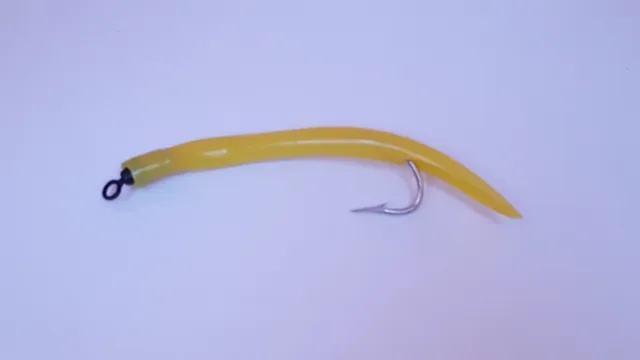

In [19]:
image

In [20]:
df.to_parquet('myfile.parquet')